# Salary Prediction using Machine Learning

The Model is predicting the salary based on Age and Years of Experience. I am using the Linear Regression Model for the Salary Dataset. 

# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import r2_score

In [6]:
import statsmodels.api as sm

In [8]:
import seaborn as sns

# Data Collection

In [2]:
Salary = pd.read_csv('Salary_Data_2.csv')

In [7]:
Salary.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


# Data Preprocessing and Analyzation

In [9]:
x = Salary[['YearsExperience','Age']]
y = Salary['Salary']

<AxesSubplot:>

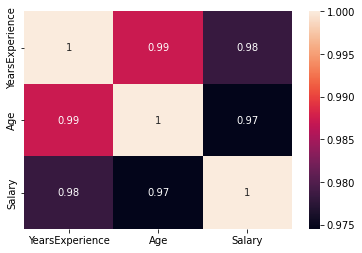

In [10]:
sns.heatmap(Salary.corr(),annot=True)

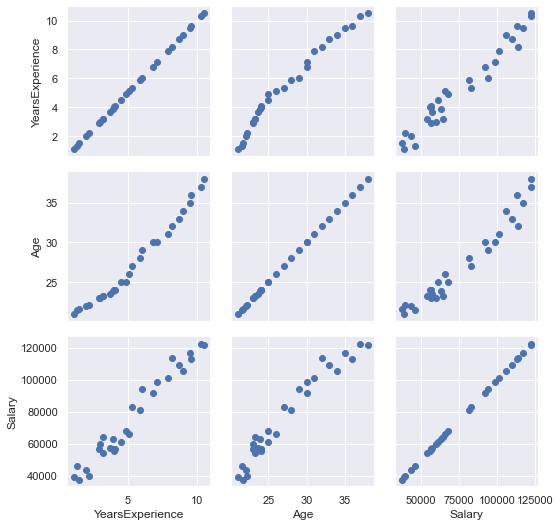

In [11]:
sns.set(style='darkgrid')
species_col = sns.PairGrid(Salary)
species_col.map(plt.scatter)

In [17]:
#correlation analysis
corr_analysis = Salary.corr()
corr_analysis

,YearsExperience,Age,Salary
YearsExperience,1.000000,0.987258,0.978242
Age,0.987258,1.000000,0.974530
Salary,0.978242,0.974530,1.000000


<AxesSubplot:>

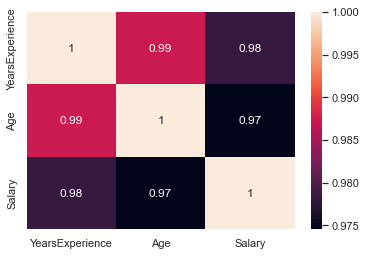

In [18]:
sns.heatmap(corr_analysis, annot = True)

# Data Training-Testing and Modelling

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
LR = LinearRegression()

In [21]:
LR.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = LR.predict(x_test)

In [32]:
print("Coefficients: ",LR.coef_)

Coefficients:  [5548.76455477 2108.02707059]


In [33]:
print("Intercept: ",LR.intercept_)

Intercept:  -10562.233064972723


## Accuracy Check 

In [25]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.9877833011811588


In [26]:
r = r2**(0.5)
print(r)

0.9938728797895426


# Summarizing the Model

In [27]:
X = sm.add_constant(x)
model= sm.OLS(y, X).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           1.35e-19
Time:                        00:03:10   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
YearsExperience  6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
Age              1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x_surf,y_surf = np.meshgrid(np.linspace(Salary.YearsExperience.min(), Salary.YearsExperience.max(), 100), np.linspace(Salary.Age.max(), 100))
onlyX = pd.DataFrame({'YearsExperience':x_surf.ravel(),'Age':y_surf.ravel()})
fittedY = LR.predict(onlyX)

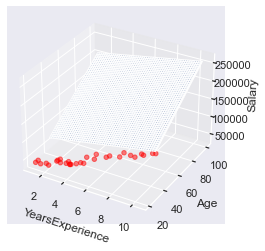

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Salary['YearsExperience'],Salary['Age'],Salary['Salary'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')
plt.show()